In [1]:
import utils
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [5]:
BASE_PATH = Path(
    "/Users/paulinawor/Documents/magisterka/Participant 3/2. Orientation Scenario"
)

orientations = {
    "back": "80 cm- back",
    "front": "80 cm- Front side",
    "left": "80 cm- left side",
    "right": "80 cm- Right side",
}

trials = ["1", "2", "3", "4"]

results_orientation = []

for orient_key, orient_folder in orientations.items():
    for t in trials:
        bin_path = BASE_PATH / orient_folder / t / "data_Raw_0.bin"
        if not bin_path.exists():
            continue

        hrv = utils.process_one_measurement(bin_path)
        if hrv is None:
            continue

        hrv.update({
            "orientation": orient_key,
            "trial": int(t)
        })

        results_orientation.append(hrv)

df_orient = pd.DataFrame(results_orientation)

In [6]:
summary_orient = df_orient.groupby("orientation").agg(["mean", "std"])
summary_orient

num_beats            mean_ibi                sdnn            \
                 mean       std      mean       std      mean       std   
orientation                                                               
back            13.25  0.500000  0.636332  0.024307  0.175313  0.040625   
front           13.00  0.816497  0.644746  0.053890  0.183710  0.072139   
left            13.00  0.816497  0.656857  0.046190  0.203173  0.072800   
right           13.50  0.577350  0.619643  0.036670  0.169824  0.032079   

                rmssd           trial            
                 mean       std  mean       std  
orientation                                      
back         0.242126  0.057469   2.5  1.290994  
front        0.242294  0.101943   2.5  1.290994  
left         0.253065  0.062219   2.5  1.290994  
right        0.231665  0.057701   2.5  1.290994

# Wnioski
Orientacja nie wpływa istotnie na liczbę wykrytych uderzeń serca.
Orientacja nie zaburza istotnie estymacji średniego rytmu serca.
Orientacje boczne (szczególnie left) są najmniej stabilne
Back i right dają bardziej powtarzalne wyniki
Krótkoterminowa HRV (RMSSD) jest najbardziej stabilna dla orientacji right/back.
Orientacja ciała względem radaru wpływa głównie na stabilność estymacji HRV (std),a nie na jej średnią wartość.

W scenariuszu orientacyjnym, przy stałej odległości 80 cm, orientacja ciała względem radaru nie wpływała istotnie na średnie wartości parametrów HRV. Zaobserwowano jednak różnice w stabilności estymacji, wyrażonej odchyleniem standardowym. Największy rozrzut wartości SDNN i RMSSD występował dla orientacji bocznej, szczególnie lewej, natomiast orientacje tyłem oraz prawym bokiem charakteryzowały się bardziej powtarzalnymi wynikami.


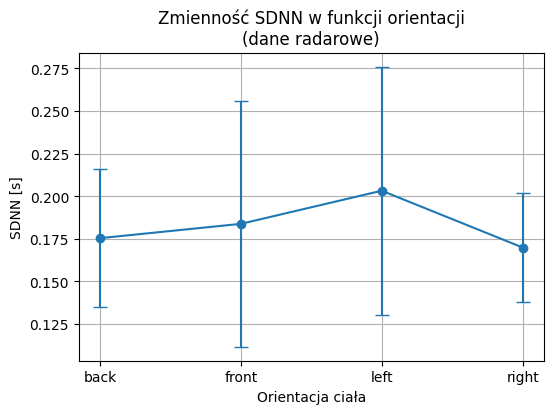

In [7]:
plt.figure(figsize=(6,4))

plt.errorbar(
    summary_orient.index,
    summary_orient["sdnn"]["mean"],
    yerr=summary_orient["sdnn"]["std"],
    fmt="o-",
    capsize=5
)

plt.xlabel("Orientacja ciała")
plt.ylabel("SDNN [s]")
plt.title("Zmienność SDNN w funkcji orientacji\n(dane radarowe)")
plt.grid(True)

plt.show()

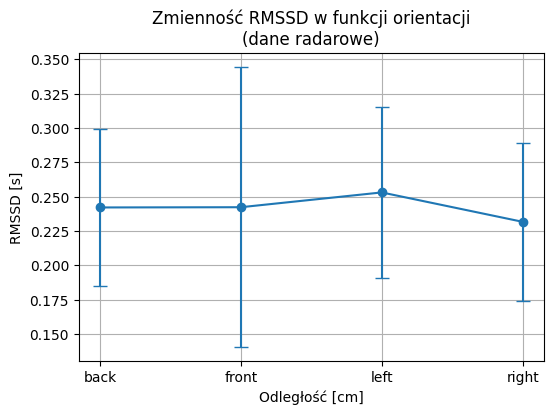

In [9]:
plt.figure(figsize=(6,4))

plt.errorbar(
    summary_orient.index,
    summary_orient["rmssd"]["mean"],
    yerr=summary_orient["rmssd"]["std"],
    fmt="o-",
    capsize=5
)

plt.xlabel("Odległość [cm]")
plt.ylabel("RMSSD [s]")
plt.title("Zmienność RMSSD w funkcji orientacji\n(dane radarowe)")
plt.grid(True)

plt.show()

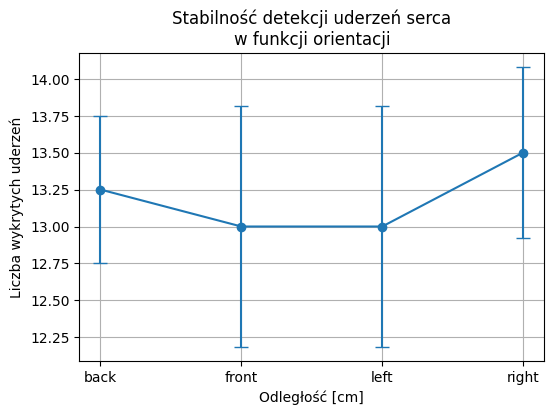

In [10]:
plt.figure(figsize=(6,4))

plt.errorbar(
    summary_orient.index,
    summary_orient["num_beats"]["mean"],
    yerr=summary_orient["num_beats"]["std"],
    fmt="o-",
    capsize=5
)

plt.xlabel("Odległość [cm]")
plt.ylabel("Liczba wykrytych uderzeń")
plt.title("Stabilność detekcji uderzeń serca\nw funkcji orientacji")
plt.grid(True)
plt.show()

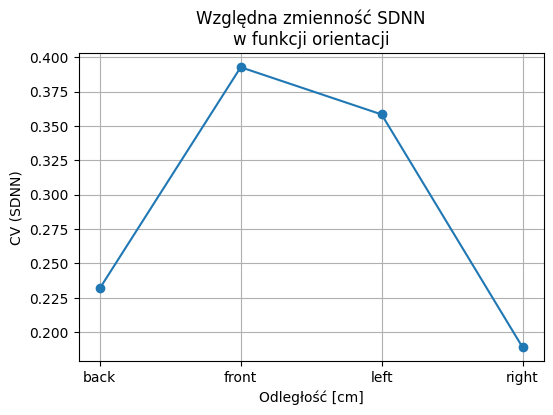

In [11]:
cv_sdnn = summary_orient["sdnn"]["std"] / summary_orient["sdnn"]["mean"]

plt.figure(figsize=(6,4))
plt.plot(cv_sdnn.index, cv_sdnn.values, "o-")

plt.xlabel("Odległość [cm]")
plt.ylabel("CV (SDNN)")
plt.title("Względna zmienność SDNN\nw funkcji orientacji")
plt.grid(True)
plt.show()

/var/folders/6x/9m2vth756wd0n_2nmdn4lt0h0000gn/T/ipykernel_79012/4072178597.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["back", "front", "left", "right"])


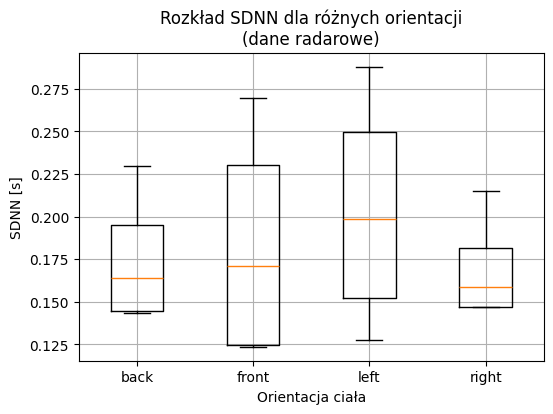

In [13]:
plt.figure(figsize=(6,4))

data = [
    df_orient[df_orient["orientation"] == o]["sdnn"]
    for o in ["back", "front", "left", "right"]
]

plt.boxplot(data, labels=["back", "front", "left", "right"])

plt.xlabel("Orientacja ciała")
plt.ylabel("SDNN [s]")
plt.title("Rozkład SDNN dla różnych orientacji\n(dane radarowe)")
plt.grid(True)

plt.show()

/var/folders/6x/9m2vth756wd0n_2nmdn4lt0h0000gn/T/ipykernel_79012/3716713892.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["back", "front", "left", "right"])


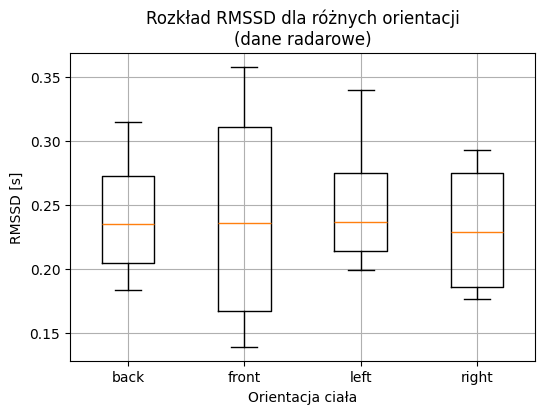

In [16]:
plt.figure(figsize=(6,4))

data = [
    df_orient[df_orient["orientation"] == o]["rmssd"]
    for o in ["back", "front", "left", "right"]
]

plt.boxplot(data, labels=["back", "front", "left", "right"])

plt.xlabel("Orientacja ciała")
plt.ylabel("RMSSD [s]")
plt.title("Rozkład RMSSD dla różnych orientacji\n(dane radarowe)")
plt.grid(True)

plt.show()

Orientacja przodem wykazuje największą zmienność RMSSD pomiędzy próbami, podczas gdy orientacje boczne (lewa i prawa) oraz tyłem zapewniają bardziej stabilną estymację. Orientacja ciała nie wpływa istotnie na średnią wartość RMSSD, lecz wpływa na rozrzut wyników pomiędzy próbami.


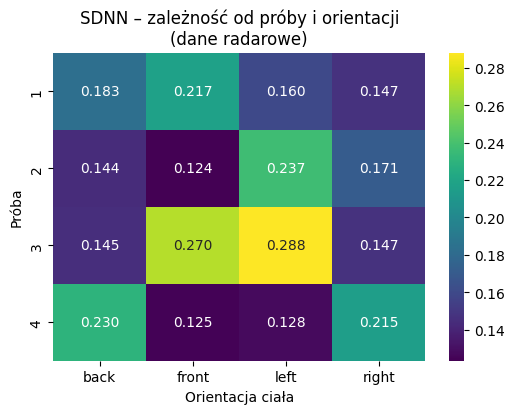

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df_orient.pivot(
    index="trial",
    columns="orientation",
    values="sdnn"
)

plt.figure(figsize=(6,4))
sns.heatmap(
    pivot,
    annot=True,
    cmap="viridis",
    fmt=".3f"
)

plt.title("SDNN – zależność od próby i orientacji\n(dane radarowe)")
plt.xlabel("Orientacja ciała")
plt.ylabel("Próba")
plt.show()

### Na koniec jeszcze wuzyalizacja jak wygląda ten sygnał 

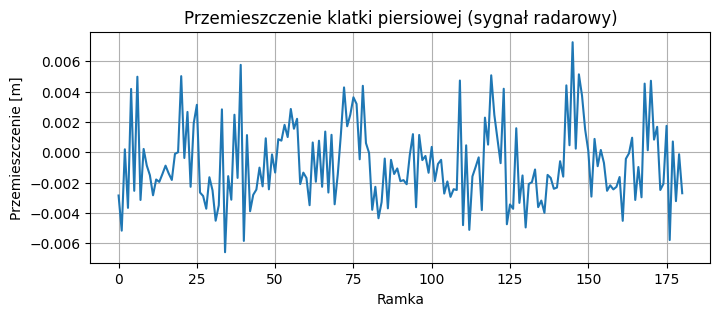

In [20]:
BASE_PATH = Path(
    "/Users/paulinawor/Documents/magisterka/Participant 3/2. Orientation Scenario"
)
orientations = "80 cm- left side"
t = "1"
bin_path = BASE_PATH / orientations / t / "data_Raw_0.bin"

iq = utils.load_radar_bin(bin_path)

range_mag = utils.compute_range_profile(iq)
chest_bin = utils.select_chest_bin(range_mag)

phase = utils.extract_phase(iq, chest_bin)
displacement = utils.phase_to_displacement(phase)

plt.figure(figsize=(8,3))
plt.plot(displacement)
plt.title("Przemieszczenie klatki piersiowej (sygnał radarowy)")
plt.xlabel("Ramka")
plt.ylabel("Przemieszczenie [m]")
plt.grid(True)
plt.show()

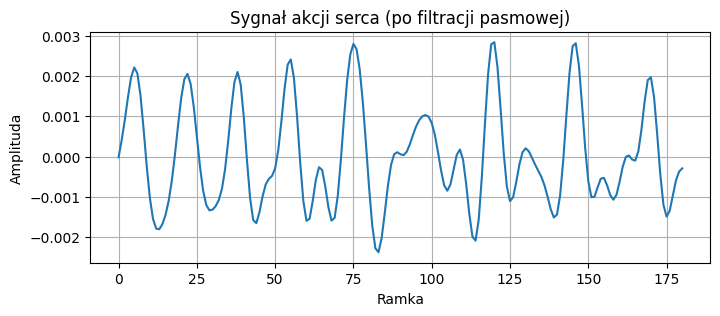

In [21]:
FS = 20.0
heart = utils.bandpass(displacement, FS, 0.8, 2.5)
plt.figure(figsize=(8,3))
plt.plot(heart)
plt.title("Sygnał akcji serca (po filtracji pasmowej)")
plt.xlabel("Ramka")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

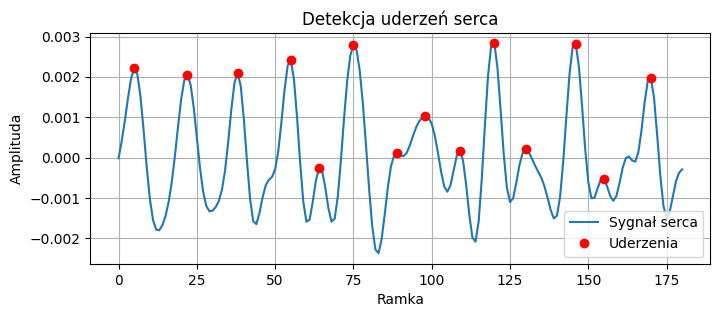

In [22]:
peaks, _ = find_peaks(
    heart,
    distance=int(FS * 0.4)
)
plt.figure(figsize=(8,3))
plt.plot(heart, label="Sygnał serca")
plt.plot(peaks, heart[peaks], "ro", label="Uderzenia")
plt.title("Detekcja uderzeń serca")
plt.xlabel("Ramka")
plt.ylabel("Amplituda")
plt.legend()
plt.grid(True)
plt.show()

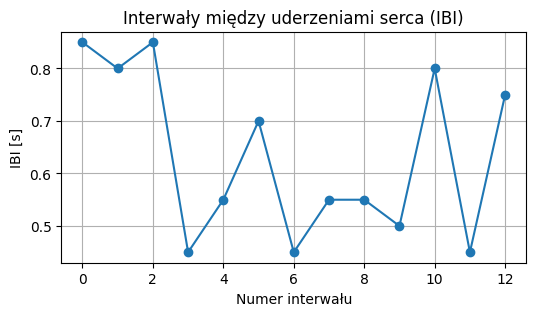

In [23]:
peak_times = peaks / FS
ibi = np.diff(peak_times)
plt.figure(figsize=(6,3))
plt.plot(ibi, marker="o")
plt.title("Interwały między uderzeniami serca (IBI)")
plt.xlabel("Numer interwału")
plt.ylabel("IBI [s]")
plt.grid(True)
plt.show()